In [7]:
# import libaries
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python

%matplotlib inline

# Load the dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
display(df.head())

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [11]:
print(df.shape)

(2443651, 9)


In [41]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [19]:
#Creating frequency table
cat_frequency = df["category"].value_counts().reset_index()
cat_frequency.columns = ["Category", "Count"]

#Display first 10 rows of the frequency table
display(cat_frequency.head(10))

,Category,Count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


In [21]:
#Top 5 most listed products
top5_cat = cat_frequency.head(5)

print("The top 5 most listed product categories are: ")
display(top5_cat)

The top 5 most listed product categories are: 


,Category,Count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


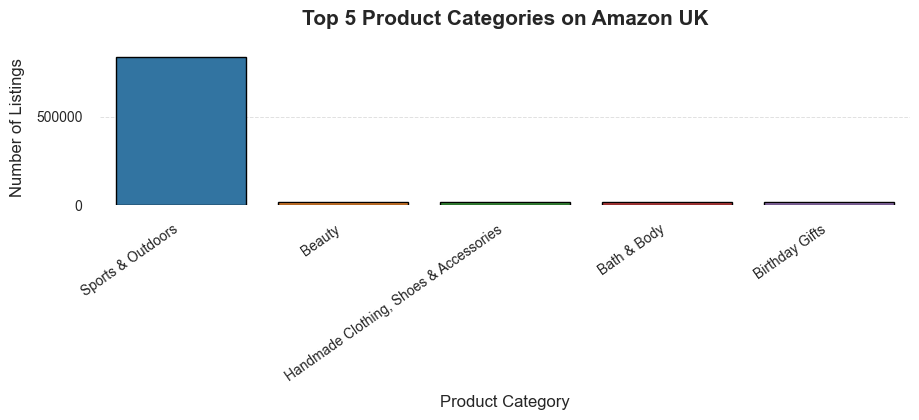

In [31]:
#Vosualizing the distribution with a Bar Chart
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  

sns.set_theme(style='whitegrid', context='talk')
plt.figure(figsize=(10, 5))

barplot = sns.barplot(
    x='Category',
    y='Count',
    hue='Category', 
    data=top5_cat,
    palette=custom_colors,
    edgecolor='black',
    linewidth=1,
    legend=False
)

plt.title('Top 5 Product Categories on Amazon UK', fontsize=15, fontweight='bold', pad=18)
plt.xlabel('Product Category', fontsize=12, labelpad=8)
plt.ylabel('Number of Listings', fontsize=12, labelpad=8)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout(pad=2)
plt.show()


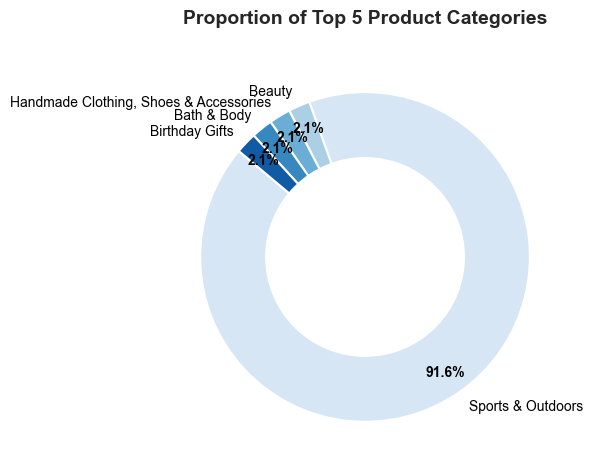

In [39]:
#Visualizing Proportions with a Pie Chart
colors = sns.color_palette('Blues', len(top5_cat))

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    top5_cat['Count'],
    labels=top5_cat['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'},
    pctdistance=0.85, 
    labeldistance=1.1,  
)

plt.setp(autotexts, size=10, weight='bold')
plt.title('Proportion of Top 5 Product Categories', fontsize=14, fontweight='bold', pad=20)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [64]:
#Calculating the mean, median and mode of Price
mean_price = round(df['price'].mean(), 2)
median_price = round(df['price'].median(), 2)
mode_price = round(df['price'].mode()[0], 2)

print("Average (Mean) Price: £", mean_price)
print("Median Price: £", median_price)
print("Mode Price: £", mode_price)

Average (Mean) Price: £ 89.24
Median Price: £ 19.09
Mode Price: £ 9.99


The average (mean) price of products listed on Amazon UK is £89.24, while the median price is £19.09, and the most common price point (mode) is £9.99.

This large difference between the mean and median indicates that the price distribution is right-skewed, a few high-priced products (likely premium or high-end items) are pulling the average upward.

In contrast, the most common price point of £9.99 suggests that most products are priced at affordable levels, appealing to budget-conscious customers.

In [66]:
price_variance = round(df['price'].var(), 2)
price_std_dev = round(df['price'].std(), 2)
price_range = round(df['price'].max(), 2) - round(df['price'].min(), 2)

print("Vairance Price: £", price_variance)
print("Starndard Deviation: £", price_std_dev)
print("Price Range: £", price_range)

Vairance Price: £ 119445.49
Starndard Deviation: £ 345.61
Price Range: £ 100000.0


In [112]:
#IQR for pricing
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print("Price IQR: £", price_iqr)

Price IQR: £ 36.0


The variance of product prices is £119,445.49 and the standard deviation is £345.61, with a price range of £100,000.00.

These values indicate a very high degree of variability in product prices. The large standard deviation and wide range show that prices are spread out across a broad spectrum, from low-cost items to very expensive ones.The variance of product prices is £119,445.49 and the standard deviation is £345.61, with a price range of £100,000.00. These values already indicate a very high degree of variability in prices, showing that products span from low-cost items to very expensive ones. 

The Interquartile Range (IQR) of £36.0 further highlights that even the middle 50% of products have prices spread over a substantial range, confirming that prices are widely dispersed across the dataset.

Conclusion: Product prices exhibit a very high degree of variability, with values spread broadly from inexpensive to premium items.

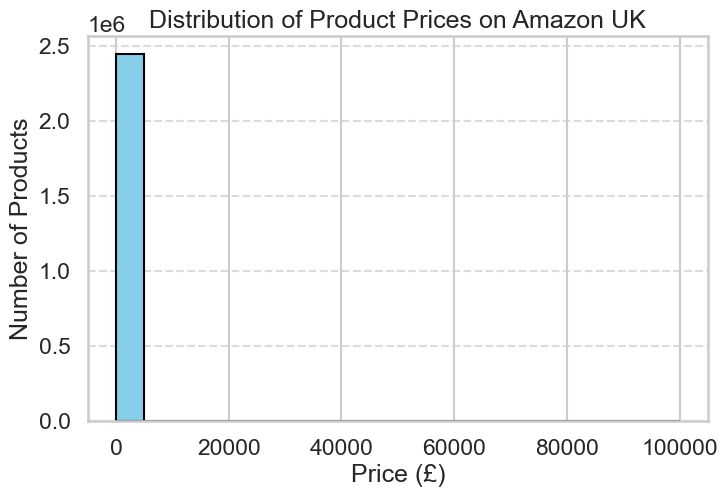

In [69]:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Product Prices on Amazon UK")
plt.xlabel("Price (£)")
plt.ylabel("Number of Products")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram is difficult to read because there is a few extremely expensive items stretching the x-axis scale. This issue can be resolved by zooming in on the range of typical prices to provide a clearer view of the main distribution

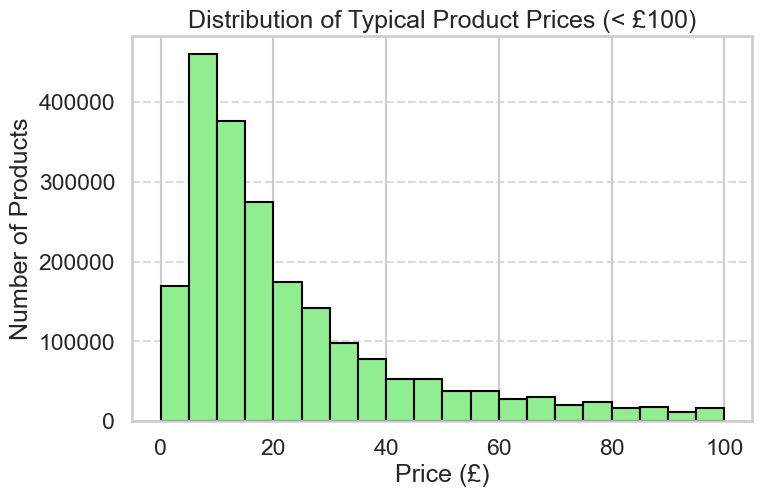

In [72]:
plt.figure(figsize=(8, 5))
plt.hist(df[df['price'] < 100]['price'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Typical Product Prices (< £100)")
plt.xlabel("Price (£)")
plt.ylabel("Number of Products")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

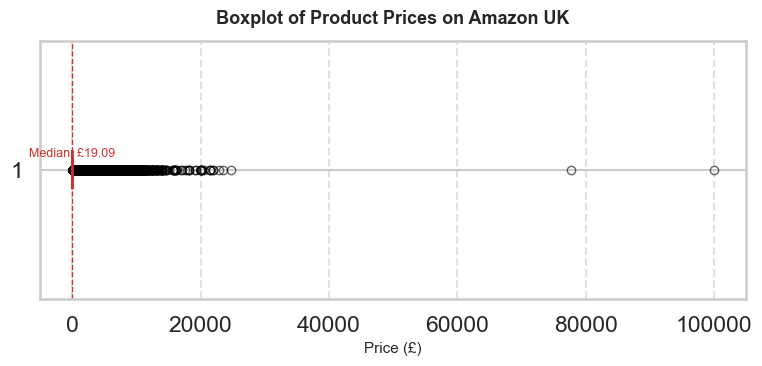

In [78]:
#Using a box plot to showcase the spread and potential outliers
plt.figure(figsize=(8, 4))

box = plt.boxplot(
    df['price'],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="#4DB6AC", color="#00897B", linewidth=1.5),
    medianprops=dict(color="#D32F2F", linewidth=2),
    whiskerprops=dict(color="#00897B", linewidth=1.5),
    capprops=dict(color="#00897B", linewidth=1.5),
    flierprops=dict(marker='o', color="#E57373", markersize=6, alpha=0.6),
)

plt.title("Boxplot of Product Prices on Amazon UK", fontsize=13, fontweight='bold', pad=12)
plt.xlabel("Price (£)", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)

median_val = df['price'].median()
plt.axvline(median_val, color="#D32F2F", linestyle='--', linewidth=1)
plt.text(median_val, 1.05, f"Median: £{median_val:.2f}", color="#D32F2F", fontsize=9, ha='center')

plt.tight_layout()
plt.show()


In [84]:
#Calculating the mean, median and mode or the rating
mean_rate = round(df['stars'].mean(), 2)
median_rate = round(df['stars'].median(), 2)
mode_rate = round(df['stars'].mode()[0], 2)

print("Average (Mean) Rating: ", mean_rate)
print("Median Rating: ", median_rate)
print("Mode Rating: ", mode_rate)

Average (Mean) Rating:  2.15
Median Rating:  0.0
Mode Rating:  0.0


Customers generally rate products very poorly. The average rating is 2.15, but both the median and mode are 0, indicating that most customers give the lowest possible rating. The common trend shows a strong tendency toward dissatisfaction.

In [89]:
#Measures of Dispersion
rate_variance = round(df['stars'].var(), 2)
rate_std_dev = round(df['stars'].std(), 2)
rate_range = round(df['stars'].max(), 2) - round(df['stars'].min(), 2)

print("Vairance Rating:", rate_variance)
print("Starndard Deviation - Rating: ", rate_std_dev)
print("Rating Range: ", rate_range)

Vairance Rating: 4.82
Starndard Deviation - Rating:  2.19
Rating Range:  5.0


In [109]:
#Calculating IQR
rate_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
print("Rating IQR: ", rate_iqr)

Rating IQR:  4.4


The ratings show a wide variation in customer feedback. A variance of 4.82 and a standard deviation of 2.19 are relatively high for a rating scale of 0–5, indicating that individual product ratings deviate significantly from the mean. The full rating range of 5.0 further confirms that ratings span the entire scale, from unrated or very low to very high. Therefore, customer feedback is not consistent across products.The ratings show a wide variation in customer feedback. A variance of 4.82 and a standard deviation of 2.19 are relatively high for a 0–5 scale, indicating that individual product ratings deviate significantly from the mean. The full rating range of 5.0 confirms that ratings span the entire scale, from unrated or very low to very high. 

Additionally, the Interquartile Range (IQR) of 4.4 shows that the middle 50% of ratings also cover almost the entire scale, further emphasizing that customer feedback is highly inconsistent across products.

Conclusion: Customer ratings are not consistent; there is significant variability in how products are rated

In [94]:
from scipy.stats import skew

skewness = skew(df['stars'])
print("Skewness:", skewness)

Skewness: 0.08120730776283251


In [106]:
from scipy.stats import kurtosis

kurt = kurtosis(df['stars'])
print("kurtosis:", kurt)

kurtosis: -1.9260046425498398


Since the skewness is positive but very close to 0, the distribution is slightly right-skewed, meaning there is a tiny tendency for higher ratings to pull the tail to the right.

However, because 0.081 is so small, the distribution is almost symmetric.
The skewness of the product ratings is 0.081, which is positive but very close to 0. This indicates that the distribution is slightly right-skewed, with a tiny tendency for higher ratings to pull the tail to the right. However, since the value is so small, the distribution is almost symmetric, showing very little asymmetry.

The kurtosis is -1.926, a negative value indicating a platykurtic distribution. This means the distribution is flatter than a normal distribution, with fewer extreme values and a wider spread of ratings.

in conclusion, the product ratings are nearly symmetric with a slightly right-skewed tendency, and they are relatively flat rather than sharply peaked, reflecting that ratings are spread out across the scale rather than clustered tightly around a single value.
In conslusion, the ratings show very little asymmetry and are nearly symmetric in their distribution.

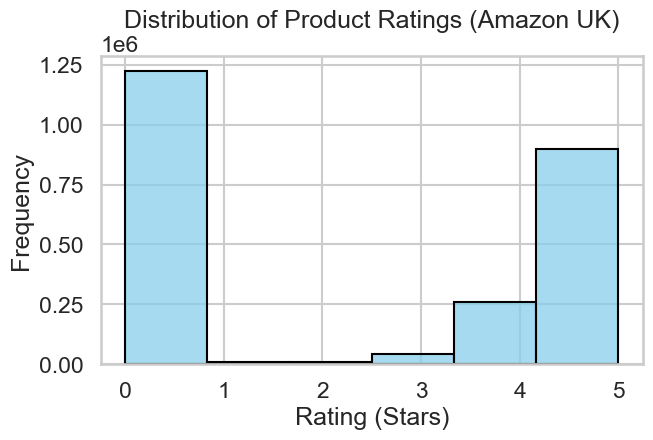

In [101]:
plt.figure(figsize=(7,4))
sns.histplot(df['stars'], bins=6, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings (Amazon UK)')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3,4,5])
plt.show()

The most common rating is 0, meaning many products are not rated.

Among the rated products, higher ratings (4–5 stars) are more frequent, showing that rated products are generally positively reviewed.

In [5]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
